In [47]:
import tweepy
from textblob import TextBlob
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from googletrans import Translator  


In [30]:
#Assigning Twitter API credentials
consumer_key= 'Ggf5VxXPXbiWHg50lsTeVZSHu'
consumer_secret= 'cNtEAWx0jjt8yC4r04vEBe6V171OznVzF0TgPv78H606Y8iNqS'
access_token= '1054079837168533504-rhj7evURZOWlNrT2T7TuXK7Q87a0AP'
access_token_secret= 'IFRqtqa4kaiJg7XW5LIYYI1SKGrFGCFnXRFgIl4mgb5YP'

#Creating authentication object
auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)


In [31]:
handle = input('Kindly, enter your Twitter account id:( text after @) ')

Kindly, enter your Twitter account id:( text after @) narendramodi


In [32]:
#Finding number of posts by the user
user=api.get_user(handle)                                                                                   #to create a user object 
print('Total posts made by user till now: ' + str(user.statuses_count))

Total posts made by user till now: 26924


In [35]:
#Extraxting 1000 tweets from the twitter user

posts=api.user_timeline(screen_name=handle,count=1000, tweet_mode='extended',lang='en')


#Print last 10 tweets of this twitter user
print('Last 10 tweets of '+ handle + '\n')
i=0
for p in posts[0:6]:
  i+=1
  print(str(i) + ". " + p.full_text + '\n')


Last 10 tweets of narendramodi

1. Will be addressing the India Global Week, organised by @IndiaIncorp at 1:30 PM tomorrow. This forum brings together global thought leaders and captains of industry, who will discuss aspects relating to opportunities in India as well as the global economic revival post-COVID.

2. कोविड महामारी के दौरान वाराणसी के नागरिकों और सामाजिक संगठनों से जुड़े लोगों ने पूरे समर्पण भाव से न केवल जरूरतमंदों की मदद की, बल्कि स्थानीय प्रशासन को भी हर प्रकार की सहायता दी। अपने संसदीय क्षेत्र के इन लोगों से कल सुबह 11 बजे होने वाले संवाद को लेकर बेहद उत्सुक हूं।

3. An important step towards transforming the agriculture sector.  https://t.co/3IvemvZWn4

4. कोरोना संकट काल में गरीबों की चिंताओं को दूर करने और उन्हें सशक्त बनाने के लिए आज कैबिनेट ने एक महत्वपूर्ण फैसले को मंजूरी दी। प्रधानंमत्री गरीब कल्याण अन्न योजना को नवंबर तक के लिए बढ़ा दिया गया है। इससे देश के 81 करोड़ लोग लाभान्वित होंगे। https://t.co/Fao7LqhXbw

5. घर का अर्थ सिर्फ ईंट और सीमेंट से चारदीवारी खड़ी

In [19]:
#Creating dataframe
df=pd.DataFrame([p.full_text for p in posts],columns=['Tweets'])
df.head()

,Tweets
0,"Will be addressing the India Global Week, orga..."
1,कोविड महामारी के दौरान वाराणसी के नागरिकों और ...
2,An important step towards transforming the agr...
3,कोरोना संकट काल में गरीबों की चिंताओं को दूर क...
4,घर का अर्थ सिर्फ ईंट और सीमेंट से चारदीवारी खड...


In [20]:
# Cleaning the text from each post 't'
# Substituing tags,hashtag symbol,endline symbol and links with empty space
def clean(t):
  t=re.sub(r'@','',t)
  t=re.sub(r'#','',t)
  t=re.sub(r'\n','',t)
  t=re.sub(r'RT[\s]+','',t)
  t=re.sub(r'https?:\/\/\S+','',t) #s might be there
  return t

df['Tweets']=df['Tweets'].apply(clean)

pd.options.display.max_colwidth = 250
df.head()

,Tweets
0,"Will be addressing the India Global Week, organised by IndiaIncorp at 1:30 PM tomorrow. This forum brings together global thought leaders and captains of industry, who will discuss aspects relating to opportunities in India as well as the global ..."
1,"कोविड महामारी के दौरान वाराणसी के नागरिकों और सामाजिक संगठनों से जुड़े लोगों ने पूरे समर्पण भाव से न केवल जरूरतमंदों की मदद की, बल्कि स्थानीय प्रशासन को भी हर प्रकार की सहायता दी। अपने संसदीय क्षेत्र के इन लोगों से कल सुबह 11 बजे होने वाले संवाद ..."
2,An important step towards transforming the agriculture sector.
3,कोरोना संकट काल में गरीबों की चिंताओं को दूर करने और उन्हें सशक्त बनाने के लिए आज कैबिनेट ने एक महत्वपूर्ण फैसले को मंजूरी दी। प्रधानंमत्री गरीब कल्याण अन्न योजना को नवंबर तक के लिए बढ़ा दिया गया है। इससे देश के 81 करोड़ लोग लाभान्वित होंगे।
4,"घर का अर्थ सिर्फ ईंट और सीमेंट से चारदीवारी खड़ी कर देना नहीं है। यह वह जगह होती है, जहां हमारे सपने आकार लेते हैं और हमारी आंकाक्षाएं उड़ान भरती हैं। आज कैबिनेट के महत्वपूर्ण फैसले से कई लोगों की जिंदगी में सकारात्मक बदलाव आएगा।"


In [55]:
#Translating tweets in any language into english
translator = Translator()
for i in range(0,df.shape[0]):
    df['Tweets'][i]=str(translator.translate(df['Tweets'][i]).text)


In [61]:
df['Tweets'] = df['Tweets'].astype(str)

In [63]:
df['Tweets'].head()

0    Will be addressing the India Global Week, organised by IndiaIncorp at 1:30 PM tomorrow. This forum brings together global thought leaders and captains of industry, who will discuss aspects relating to opportunities in India as well as the global ...
1    During the Kovid epidemic, citizens of Varanasi and people associated with social organizations not only helped the needy with full dedication, but also provided all kinds of assistance to the local administration. I am very keen on the dialogue ...
2                                                                                                                                                                                               An important step towards transforming the agriculture sector.
3        The cabinet today approved an important decision to address the concerns of the poor and empower them in the Corona crisis. Pradhanmantri Garib Kalyan Anna Yojana has been extended till November. This will benefit 81 crore peo

In [64]:
#Finding subjectivity and polarity in each post
def get_sub(t):
  return float(TextBlob(t).sentiment.subjectivity)

def get_pol(t):
  return float(TextBlob(t).sentiment.polarity)

df['Subjectivity']=df['Tweets'].apply(get_sub)
df['Polarity']=df['Tweets'].apply(get_pol)

pd.options.display.max_colwidth = 100
df.head()


,Tweets,Subjectivity,Polarity
0,"Will be addressing the India Global Week, organised by IndiaIncorp at 1:30 PM tomorrow. This for...",0.050000,0.050000
1,"During the Kovid epidemic, citizens of Varanasi and people associated with social organizations ...",0.383333,0.116667
2,An important step towards transforming the agriculture sector.,1.000000,0.400000
3,The cabinet today approved an important decision to address the concerns of the poor and empower...,0.800000,0.000000
4,The meaning of the house is not just to build a boundary wall with brick and cement. This is whe...,0.681818,0.375758


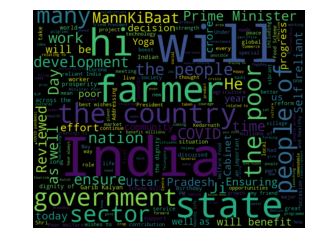

In [65]:
#Plotting Word Cloud
combine=' '.join([tweet for tweet in df['Tweets'] ])
wordcloud=WordCloud(width=1000, height=800,max_font_size=200).generate(combine)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


In [66]:
#Carrying out the analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"Will be addressing the India Global Week, organised by IndiaIncorp at 1:30 PM tomorrow. This for...",0.050000,0.050000,Positive
1,"During the Kovid epidemic, citizens of Varanasi and people associated with social organizations ...",0.383333,0.116667,Positive
2,An important step towards transforming the agriculture sector.,1.000000,0.400000,Positive
3,The cabinet today approved an important decision to address the concerns of the poor and empower...,0.800000,0.000000,Neutral
4,The meaning of the house is not just to build a boundary wall with brick and cement. This is whe...,0.681818,0.375758,Positive


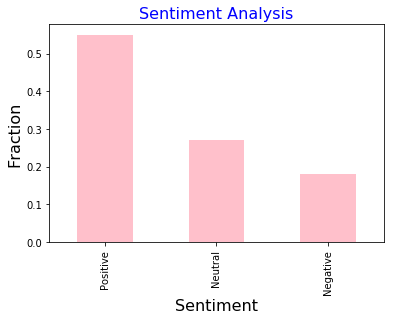

In [67]:
#Show the percentage of positive, negative and neutral tweets
plt.title('Sentiment Analysis',size=16,color='blue')
plt.xlabel('Sentiment',size=16)
plt.ylabel('Fraction',size=16)
df['Analysis'].value_counts(normalize=True).plot(kind='bar',color='pink')
plt.show()

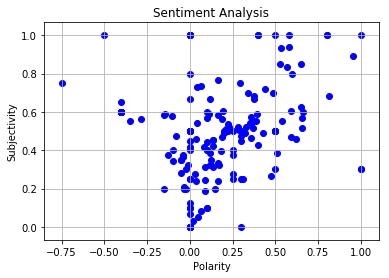

<Figure size 720x576 with 0 Axes>

In [68]:
#Plotting polarity and subjectivity
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.figure(figsize=(10,8))
plt.show( )


In [69]:
#Printing top 5 positive tweets sorted in decreasing order of positivity
sortp_df=df.loc[df['Analysis']=='Positive'].sort_values(by=['Polarity'],ascending=False).head()
j=1
for i in sortp_df['Tweets']:
  print(str(j)+ '. '+i)
  j+=1


1. My friend President jairbolsonaro, my prayers and best wishes for your speedy recovery.
2. My friend President jairbolsonaro, my prayers and best wishes for your speedy recovery.
3. Had an excellent conversation with my friend PM netanyahu about how India-Israel can collaborate in the post-COVID world. Also congratulated him for assuming the Prime Ministerial office for a record 5th time! India-Israel partnership will grow ever stronger in the days to come.
4. Two very good news:Population of the majestic Asiatic Lion, living in Gujarat’s Gir Forest, is up by almost 29%.Geographically, distribution area is up by 36%.Kudos to the people of Gujarat and all those whose efforts have led to this excellent feat.
5. Kalidasa Jayantya: Hearty - Best wishes: Socio-ordinary caste: Kalidasa: Swasya Kritibhi: Great poet: Kavikulguru: Abhavat. Sa: Ajpal: Asit is a very famous folktale. Sacrifice: Tapasya Prajaseva Bharatiyadarshanam Rashtriya-Jivanmulyani etc.


In [70]:
#Printing top 5 negative tweets sorted in decreasing order of negativity
sortp_df=df.loc[df['Analysis']=='Negative'].sort_values(by=['Polarity'],ascending=True).head()
j=1
for i in sortp_df['Tweets']:
  print(str(j)+ '. '+i)
  j+=1


1. Pained by the tragic demise of Sikh pilgrims in Pakistan. My thoughts are with their families and friends in this hour of grief.I pray that those pilgrims injured recover at the earliest.
2. In this difficult time of COVID-19 pandemic, wishing Armenian PM NikolPashinyan and his family a speedy recovery. India stands with Armenia in the fight against COVID-19.
3. Ensuring the dignity of the poor. The extension of the Prime Minister's Poor Rehabilitation Diet will benefit millions of poor people across the country.
4. Ensuring the dignity of the poor. Extending the duration of the Prime Minister's Poor Welfare Food Scheme will benefit millions of poor people across the country.
5. Gained self-esteem for the poor. The extension of the Prime Minister's Poor Welfare Food Scheme will benefit billions of poor across the country.
